# Introduction

The given problem statement is as following:<br>
Given speeches of different RBI Governors differentiate between the Governors using Natural Language Processing.<br>
<br>
The Governors chosen are : Raghuram Rajan and Y. Venugopal Reddy. For each of the two there are 5 speeches in the data folder.

# Required Packages

In [1]:
# Reading data
import glob
from PyPDF2 import PdfFileReader

# Text Preprocessing
import nltk
from nltk.corpus import stopwords 
from nltk.stem.wordnet import WordNetLemmatizer
from nltk import word_tokenize
from nltk.stem import PorterStemmer

# Topic Modelling
import gensim
from gensim import corpora

# Clustering
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn import metrics

# miscellaneous
import string
import re

# Read Speechs

Define a function to read text from all pages for a given path of the PDF.

In [2]:
def text_extractor(path):
    text = ""
    with open(path, 'rb') as f:
        pdf = PdfFileReader(f)
        # get the first page
        num_pages = pdf.getNumPages()
        for page in range(num_pages):
            content = pdf.getPage(page)
            text = text + content.extractText()
        return text

## Raghuram Rajan

Get file names for Raghuram Rajan's Speeches.

In [3]:
raghu_ram_names = []
for filename in glob.iglob('data/raghu_ram/*.pdf'):
    raghu_ram_names.append(filename)

Read the text for each of the speech.

In [4]:
doc_complete_rr = []
all_text_rr = ""
for name in raghu_ram_names:
    text = text_extractor(name)
    doc_complete_rr.append(text)
    all_text_rr += text

## Y. Venugopal Reddy

Get all the names for Y. Venugopal Reddy's Speeches.

In [5]:
reddy_names = []
for filename in glob.iglob('data/reddy/*.pdf'):
    reddy_names.append(filename)

Read the text for each speech.

In [6]:
doc_complete_reddy = []
all_text_reddy = ""
for name in reddy_names:
    text = text_extractor(name)
    doc_complete_reddy.append(text)
    all_text_reddy += text

# Clean Text

Remove stop words, punctuations and lemmatization of words.

In [7]:
stop = set(stopwords.words('english'))
exclude = set(string.punctuation) 
lemma = WordNetLemmatizer()
def clean(doc):
    stop_free = " ".join([i for i in doc.lower().split() if i not in stop])
    punc_free = ''.join(ch for ch in stop_free if ch not in exclude)
    normalized = " ".join(lemma.lemmatize(word) for word in punc_free.split())
    return normalized

## Raghuram Rajan

Remove stop words, punctuation and tokenization of words.

In [8]:
_rr = " ".join([i for i in all_text_rr.lower().split() if i not in stop])
_rr = ''.join(ch for ch in _rr if ch not in exclude)
token_rr = nltk.word_tokenize(_rr)
tokens_rr = [t for t in token_rr if t.lower() not in stop]

### Frequency Distribution Plot

Plotting distribution of most used words.

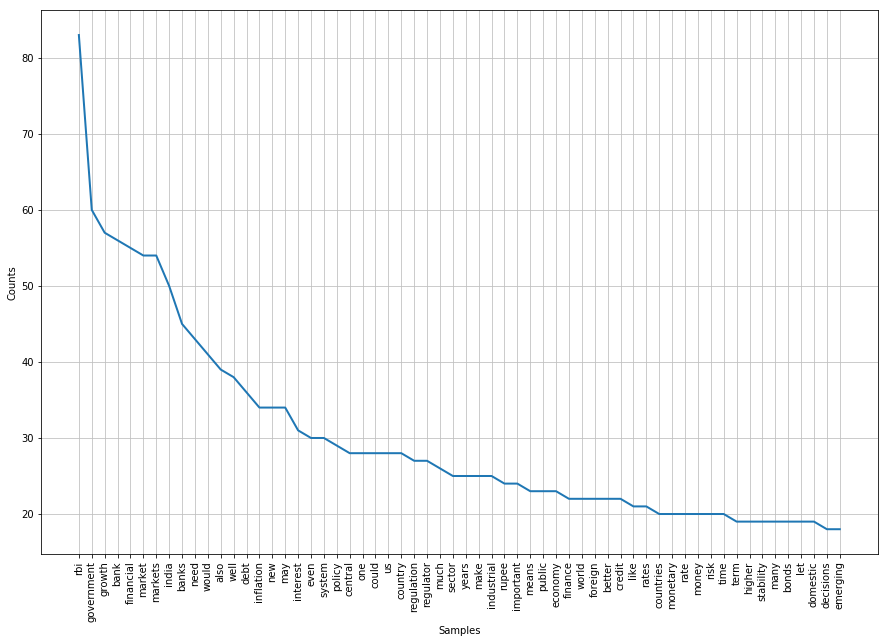

In [34]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 10))
dist = nltk.FreqDist(tokens_rr)
dist.plot(60, cumulative=False)
plt.show()

### Common Bigrams

Get top 60 repeating bigrams.

In [10]:
text_rr = nltk.Text(token_rr)
collocation = text_rr.collocations(num=60)

central bank; interest rates; industrial countries; macroeconomic
stability; reserve bank; going forward; monetary policy; checks
balances; urjit patel; medium term; emerging markets; exchange rate;
current account; middle class; highly rated; finance ministry; fixed
income; united states; public sector; foreseeable future; ﬁmake
indiaﬂ; financial sector; aggregate demand; consumer protection; five
pillars; free lunch; special dividend; social security; fslrc report;
masala bonds; low stable; account deficit; even though; yield curve;
bad behaviour; financial system; committee report; bottom line; mark
ets; research departments; tens thousands; transportation network;
tyler cowen; let conclude; money came; asset price; exportled growth;
make india; interest rate; still dominated; state government; long
term; liquidity depth; governor™s rank; quantitative easing; quasi
sovereign; safety soundness; wolfgang streeck; industrial country; new
delhi


## Y. Venugopal Reddy

Remove stop words, punctuations and lemmatization of words.

In [11]:
_reddy = " ".join([i for i in all_text_reddy.lower().split() if i not in stop])
_reddy = ''.join(ch for ch in _reddy if ch not in exclude)
token_reddy = nltk.word_tokenize(_reddy)
tokens_reddy = [t for t in token_reddy if t.lower() not in stop]

### Frequency Distribution Plot

Plotting distribution of most used words.

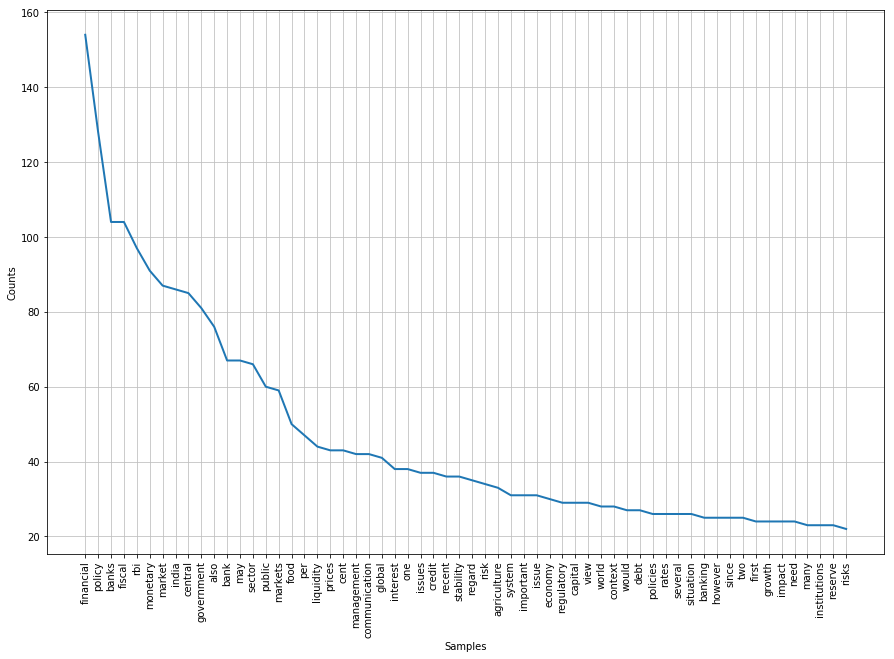

In [12]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 10))
dist = nltk.FreqDist(tokens_reddy)
dist.plot(60, cumulative=False)
plt.show()

### Common Bigrams

Get top 60 repeating bigrams.

In [13]:
text = nltk.Text(token_reddy)
collocation = text.collocations(num=60)

per cent; monetary policy; central bank; financial markets; foreign
currency; reserve bank; interest rates; central banks; interest rate;
borrowing programme; financial institutions; market participants;
andhra pradesh; financial sector; real estate; htm category; treasury
bills; state governments; food prices; financial stability; public
policy; common person; recent years; moral suasion; risk management;
systemically important; government securities; fiscal situation; put
place; inflation expectations; bank india; fiscal policy; food
security; banking system; loans advances; external sector;
responsibility bill; money market; corporate clients; fiscal deficit;
private sector; capital adequacy; rating agencies; cash balances;
aggregate demand; balance sheet; economic reforms; basis points; price
stability; standard assets; professor blinder; currency sovereign;
ministry finance; card receivables; inter alia; fiscal responsibility;
frbm act; medium term; previous year; monetary managem

# Topic Modelling on each Speech

## Raghuram Rajan

For each speech find 3 topics containing 3 words.

In [14]:
for doc in doc_complete_rr:
    doc_clean  = [clean(doc).split()]
    dictionary = corpora.Dictionary(doc_clean)
    doc_term_matrix_rr = dictionary.doc2bow([doc])
    Lda_rr = gensim.models.ldamodel.LdaModel

    ldamodel_rr = Lda_rr(doc_term_matrix_rr, num_topics=3, id2word = dictionary, passes=1, random_state=100)
    print(ldamodel_rr.print_topics(num_topics=3, num_words=3))

[(0, '0.001*"early" + 0.001*"cabinet" + 0.001*"committee"'), (1, '0.001*"ﬁcrisisﬂ" + 0.001*"look" + 0.001*"regularly"'), (2, '0.001*"combined" + 0.001*"directly" + 0.001*"fewer"')]
[(0, '0.001*"explicit" + 0.001*"claim" + 0.001*"credit"'), (1, '0.001*"receipt" + 0.001*"vice" + 0.001*"complex"'), (2, '0.001*"increase" + 0.001*"many" + 0.001*"easy"')]
[(0, '0.001*"depress" + 0.001*"became" + 0.001*"capitalintensive"'), (1, '0.001*"took" + 0.001*"worry" + 0.001*"responsibly"'), (2, '0.001*"another" + 0.001*"transparency" + 0.001*"exported"')]
[(0, '0.002*"firmer" + 0.002*"changing" + 0.002*"course"'), (1, '0.002*"certainly" + 0.002*"framed" + 0.002*"difficult"'), (2, '0.002*"tribunal™s" + 0.002*"problem" + 0.002*"arguing"')]
[(0, '0.002*"form" + 0.002*"consumption" + 0.002*"disadvantage"'), (1, '0.002*"committee" + 0.002*"foreign" + 0.002*"easy"'), (2, '0.002*"strong" + 0.002*"world" + 0.002*"path"')]


While a lot of the topics make sense, some of the topics are hard to interpret. 

## Y. Venugopal Reddy

For each speech find 3 topics containing 3 words.

In [15]:
for doc in doc_complete_reddy:
    doc_clean  = [clean(doc).split()]
    dictionary = corpora.Dictionary(doc_clean)
    doc_term_matrix_rr = dictionary.doc2bow([doc])
    Lda_rr = gensim.models.ldamodel.LdaModel

    ldamodel_rr = Lda_rr(doc_term_matrix_rr, num_topics=3, id2word = dictionary, passes=1,random_state=100)
    print(ldamodel_rr.print_topics(num_topics=3, num_words=3))

[(0, '0.001*"conduct" + 0.001*"arguably" + 0.001*"basel"'), (1, '0.001*"mandated" + 0.001*"onduits" + 0.001*"identify"'), (2, '0.001*"subsequent" + 0.001*"monitor" + 0.001*"recognised"')]
[(0, '0.003*"medium" + 0.003*"earlier" + 0.003*"financed"'), (1, '0.003*"remark" + 0.002*"unexpected" + 0.002*"yvreddy"'), (2, '0.002*"based" + 0.002*"third" + 0.002*"look"')]
[(0, '0.001*"destination" + 0.001*"becomes" + 0.001*"characteristic"'), (1, '0.001*"target" + 0.001*"however" + 0.001*"unique"'), (2, '0.001*"acquired" + 0.001*"brief" + 0.001*"data"')]
[(0, '0.001*"clearly" + 0.001*"analysis" + 0.001*"assistance"'), (1, '0.001*"incomesensitive" + 0.001*"likely" + 0.001*"facto"'), (2, '0.001*"recognise" + 0.001*"illiquid" + 0.001*"step"')]
[(0, '0.001*"dramatic" + 0.001*"besides" + 0.001*"coinciding"'), (1, '0.001*"management" + 0.001*"restrict" + 0.001*"accounting"'), (2, '0.001*"constant" + 0.001*"elevated" + 0.001*"academic"')]


Here also we see that not all the topics found are sensible. <br>
But importantly we see that topics themsevles are very different for both gorvernors .

Since modelling on each speech is not giving us clear results we try to model on all speeches combined and hope that this gives us a better idea about the overall policies of each governor.

# Topic Modelling on all Speeches Combined

## Raghuram Rajan

In [16]:
doc_clean_rr_full = [clean(doc).split() for doc in doc_complete_rr]
dictionary_rr_full = corpora.Dictionary(doc_clean_rr_full)
doc_term_matrix_rr_full = [dictionary_rr_full.doc2bow(doc) for doc in doc_clean_rr_full]

In [17]:
# Creating the object for LDA model using gensim library
Lda_rr_full = gensim.models.ldamodel.LdaModel

# Running and Trainign LDA model on the document term matrix.
ldamodel_rr_full = Lda_rr_full(doc_term_matrix_rr_full, num_topics=5, id2word = dictionary_rr_full,passes=50, random_state=10)

In [18]:
print(ldamodel_rr_full.print_topics(num_topics=5, num_words=3))

[(0, '0.024*"market" + 0.015*"bank" + 0.008*"bond"'), (1, '0.000*"market" + 0.000*"rbi" + 0.000*"bank"'), (2, '0.012*"rbi" + 0.010*"bank" + 0.008*"government"'), (3, '0.000*"bank" + 0.000*"market" + 0.000*"need"'), (4, '0.014*"growth" + 0.009*"country" + 0.008*"india"')]


Topic modelling over all speeches gives us much better results.<br>
We see that most of the topics are talking about some relationship between RBI, Banks, Govenrment and Markets. One of the topics is talking about the growth of the country.

## Y. Venugopal Reddy

In [19]:
doc_clean_reddy_full = [clean(doc).split() for doc in doc_complete_reddy]
dictionary_reddy_full = corpora.Dictionary(doc_clean_reddy_full)
doc_term_matrix_reddy_full = [dictionary_reddy_full.doc2bow(doc) for doc in doc_clean_reddy_full]

In [20]:
# Creating the object for LDA model using gensim library
Lda_reddy_full = gensim.models.ldamodel.LdaModel

# Running and Trainign LDA model on the document term matrix.
ldamodel_reddy_full = Lda_reddy_full(doc_term_matrix_reddy_full, num_topics=5, id2word = dictionary_reddy_full,passes=50,random_state=10)

In [21]:
print(ldamodel_reddy_full.print_topics(num_topics=5, num_words=3))

[(0, '0.016*"price" + 0.015*"food" + 0.010*"agriculture"'), (1, '0.018*"financial" + 0.017*"bank" + 0.012*"market"'), (2, '0.018*"communication" + 0.017*"bank" + 0.016*"central"'), (3, '0.000*"policy" + 0.000*"financial" + 0.000*"market"'), (4, '0.022*"fiscal" + 0.016*"government" + 0.013*"policy"')]


The set of topics obtained is even more diverse. Here we see topics like cost of food and agriculture, communication between the bank and the center. We also see topics on fiscal policy for the market and the government.

# Clustering on all Speeches

Uptill now we have worked on each gorvernor individually. Now we combine all the text together and we try to see if we can clearly differentiate between them using clustering. <br>
We make two clusters on the entire corpus and hopefully they resolve into two well defined clusters, one for each governor.

In [22]:
all_text = all_text_rr + all_text_reddy

In [23]:
lines = all_text.split("\n")[1:-1]

In [24]:
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf = tfidf_vectorizer.fit_transform(lines)

In [30]:
kmeans = KMeans(n_clusters=2).fit(tfidf)

In [31]:
order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]
terms = tfidf_vectorizer.get_feature_names()

In [33]:
for i in range(2):
    print("Cluster %d:" % i)
    for ind in order_centroids[i, :10]:
        print('%s' % terms[ind])

Cluster 0:
money
turn
evidence
evaluated
evaluation
evening
evens
events
eventually
evergreen
Cluster 1:
rbi
governor
board
governors
dividend
threw
barely
fails
warn
complexities
Cluster 2:
government
financial
bank
policy
india
banks
market
central
monetary
markets
Cluster 3:
highest
world
continues
percentage
gdp
based
context
evolved
ew
evade


From the centers we clearly see that the cluster centers are too close to each other.

To check how well resolved the clusters are lets find the average silhouette score.

In [28]:
labels = kmeans.labels_
silhouette_score = metrics.silhouette_score(tfidf, labels, metric='euclidean')

In [29]:
silhouette_score

0.12146334508884836

A score of 0.12 means that there is overlap between the two clusters.